In [48]:
from ultralytics import YOLO
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image

In [54]:
model = YOLO("yolov8n.pt").to('cuda')  # load a pretrained model (recommended for training)
ae = tf.keras.models.load_model('./Autoencoder_Higher_Dimension.keras')

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Advait\.cache\kagglehub\datasets\navoneel\brain-mri-images-for-brain-tumor-detection\versions\1


In [55]:
root_no = 'C:/Users/Advait/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/no'
root_yes = 'C:/Users/Advait/.cache/kagglehub/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/versions/1/yes'

no = []
for img in os.listdir(root_no):
    current_img = Image.open(root_no+'/'+img).resize((64, 64)).convert('RGB')
    no.append(np.array(current_img))
    del current_img

yes = []
for img in os.listdir(root_yes):
    current_img = Image.open(root_yes+'/'+img).resize((64, 64)).convert('RGB')
    yes.append(np.array(current_img))
    del current_img

no, yes = np.array(no)/255, np.array(yes)/255

In [70]:
ae.fit(no, no, epochs=20)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 1.3516e-04 
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 1.3486e-04 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 1.2615e-04 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 1.2641e-04 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 1.2094e-04 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 1.2683e-04 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 1.2018e-04 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 1.2050e-04 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.1787e-04 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 1.1799e-04 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1.1524e-04 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 1.2015e-04 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.7954e-04 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 1.8292e-04 
Epoch 15/20
4/4 ━━━━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


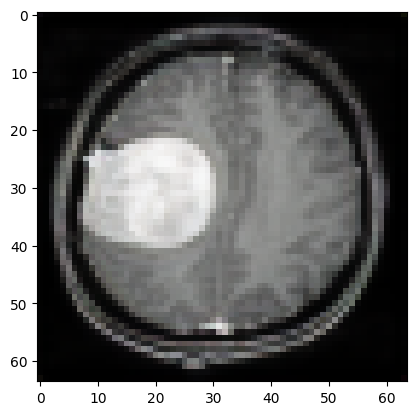

In [72]:
plt.imshow(ae.predict(yes)[0])


In [ ]:
from sklearn.metrics import mean_squared_error as mse

mse1 = np.square(no[2].flatten()-ae.predict(no)[2].flatten())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [101]:
mse2 = np.square(no[0].flatten()-ae.predict(no)[0].flatten())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(mse1, mse2)

TtestResult(statistic=np.float64(-2.225896025579733), pvalue=np.float64(0.026030181118791202), df=np.float64(24574.0))

In [ ]:
# Train the model
results = model.train(data="brain-tumor.yaml", epochs=1, imgsz=640)

engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=brain-tumor.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dyn

train: Scanning C:\Users\Advait\ACVA-Project\ACV Project\datasets\brain-tumor\train\labels.cache... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<?, ?it/s]
val: Scanning C:\Users\Advait\ACVA-Project\ACV Project\datasets\brain-tumor\valid\labels.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.11G      1.376      3.402      1.208         26        640: 100%|██████████| 56/56 [00:14<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        223        241    0.00226      0.644       0.22      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.09G      1.216      2.349      1.126         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        223        241       0.48        0.6      0.425      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.09G      1.254      2.108      1.158         28        640: 100%|██████████| 56/56 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        223        241      0.425       0.61       0.42      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.09G      1.203      1.798      1.137         17        640: 100%|██████████| 56/56 [00:11<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        223        241      0.432       0.75      0.489      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.09G      1.184      1.596      1.119         18        640: 100%|██████████| 56/56 [00:11<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        223        241      0.447      0.771       0.48      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.09G       1.12      1.469      1.095         18        640: 100%|██████████| 56/56 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        223        241      0.431      0.826      0.476      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.08G      1.117      1.377      1.093         20        640: 100%|██████████| 56/56 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        223        241      0.482      0.798      0.478      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.08G      1.096      1.344      1.075         20        640: 100%|██████████| 56/56 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.451      0.792       0.51      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.08G      1.096      1.303       1.08         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        223        241      0.451      0.804      0.474      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.08G      1.099      1.289      1.082         24        640: 100%|██████████| 56/56 [00:11<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        223        241      0.428      0.761      0.457      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.08G      1.058      1.249      1.064         25        640: 100%|██████████| 56/56 [00:11<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        223        241      0.451      0.782      0.444      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.08G      1.086      1.227      1.078         20        640: 100%|██████████| 56/56 [00:11<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.49it/s]

                   all        223        241      0.429       0.82      0.461      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.08G      1.065      1.246      1.074         15        640: 100%|██████████| 56/56 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]

                   all        223        241      0.442      0.829      0.484      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.08G      1.055      1.193      1.055         19        640: 100%|██████████| 56/56 [00:11<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]

                   all        223        241      0.461      0.835      0.477       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.08G     0.9926      1.135      1.028         20        640: 100%|██████████| 56/56 [00:11<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        223        241      0.435      0.838      0.478      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.08G      1.033      1.166      1.053         24        640: 100%|██████████| 56/56 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        223        241      0.425      0.846      0.485      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.08G      1.038      1.129      1.066         18        640: 100%|██████████| 56/56 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]

                   all        223        241      0.447      0.818      0.471      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.08G      1.002      1.115      1.043         17        640: 100%|██████████| 56/56 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        223        241      0.431      0.823      0.429      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.08G      1.005      1.133      1.041         19        640: 100%|██████████| 56/56 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.54it/s]

                   all        223        241      0.435      0.841      0.432        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.08G      1.014      1.073      1.039         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        223        241      0.442      0.796      0.439      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.09G     0.9931       1.09      1.039         14        640: 100%|██████████| 56/56 [00:11<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        223        241      0.411      0.827      0.413      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.08G     0.9963      1.088      1.038         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        223        241      0.432      0.825      0.438      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.08G     0.9826      1.026      1.032         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]

                   all        223        241      0.418      0.804      0.422      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.08G      1.009      1.047      1.041         24        640: 100%|██████████| 56/56 [00:12<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        223        241      0.396      0.747      0.428      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.08G     0.9586      1.018      1.024         13        640: 100%|██████████| 56/56 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        223        241      0.428      0.854      0.445      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.08G     0.9512      1.003      1.021         35        640: 100%|██████████| 56/56 [00:14<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        223        241      0.457      0.817      0.474      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.08G     0.9715      1.004      1.023         18        640: 100%|██████████| 56/56 [00:13<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        223        241      0.423      0.828      0.422      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.08G     0.9414      0.991      1.008         23        640: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        223        241      0.434      0.828      0.498      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.08G     0.9295     0.9572     0.9923         19        640: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        223        241      0.468      0.783      0.497      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.08G     0.9469     0.9826       1.01         21        640: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        223        241      0.418      0.852      0.428      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.08G     0.9283     0.9605      1.002         17        640: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        223        241      0.399      0.849      0.449      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.08G     0.9543     0.9763      1.019         17        640: 100%|██████████| 56/56 [00:13<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        223        241      0.429      0.807      0.429        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.08G     0.9427     0.9373       1.01         16        640: 100%|██████████| 56/56 [00:13<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        223        241       0.39      0.872      0.403      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.08G     0.9191     0.9227      1.004         25        640: 100%|██████████| 56/56 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        223        241      0.431       0.86      0.454      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.08G      0.941     0.9193      1.007         16        640: 100%|██████████| 56/56 [00:14<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]

                   all        223        241      0.415      0.783      0.433      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.08G       0.91     0.9167     0.9986         18        640: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        223        241      0.423      0.871      0.458      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.08G     0.9042      0.897     0.9994         19        640: 100%|██████████| 56/56 [00:11<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241       0.35      0.776      0.414      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.08G      0.916     0.9201     0.9949         25        640: 100%|██████████| 56/56 [00:11<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]

                   all        223        241      0.434      0.769      0.459      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.08G     0.8959     0.8855       0.99         26        640: 100%|██████████| 56/56 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.50it/s]

                   all        223        241      0.459      0.758       0.47       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.08G     0.9215     0.8757      1.005         17        640: 100%|██████████| 56/56 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.422      0.797      0.464      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.08G     0.8911     0.8292     0.9908         20        640: 100%|██████████| 56/56 [00:11<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        223        241      0.397      0.793      0.442      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.08G     0.8802     0.8291     0.9783         16        640: 100%|██████████| 56/56 [00:11<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        223        241      0.364      0.775      0.388      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.08G     0.9062     0.8581     0.9947         16        640: 100%|██████████| 56/56 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.46it/s]

                   all        223        241      0.444      0.858      0.536      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.08G     0.8916     0.8363     0.9909         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        223        241      0.421      0.803      0.442      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.08G     0.9054     0.8443     0.9917         19        640: 100%|██████████| 56/56 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        223        241      0.438      0.816      0.455      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.08G     0.8764       0.79      0.995         22        640: 100%|██████████| 56/56 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]

                   all        223        241      0.436      0.825      0.479      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.08G     0.8891     0.8072      1.002         14        640: 100%|██████████| 56/56 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        223        241      0.404      0.829      0.433      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.09G     0.9025     0.7962     0.9873         24        640: 100%|██████████| 56/56 [00:12<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        223        241      0.435      0.811      0.529      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.08G     0.8524     0.7405     0.9786         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.489      0.791      0.516      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.08G     0.8496     0.7725     0.9725         23        640: 100%|██████████| 56/56 [00:11<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.37it/s]

                   all        223        241      0.447      0.681      0.477       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.08G     0.8606     0.7675     0.9801         19        640: 100%|██████████| 56/56 [00:11<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        223        241      0.369      0.838       0.41      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.08G     0.8483     0.7494     0.9846         20        640: 100%|██████████| 56/56 [00:11<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]

                   all        223        241      0.445      0.805      0.488       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.08G     0.8492     0.7317     0.9765         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.467      0.813        0.5      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.08G     0.8397     0.6985     0.9718         19        640: 100%|██████████| 56/56 [00:11<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all        223        241      0.431      0.784       0.48      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.08G     0.8471     0.6954     0.9691         21        640: 100%|██████████| 56/56 [00:11<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        223        241      0.434      0.743      0.456      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.08G     0.8352     0.7255     0.9702         24        640: 100%|██████████| 56/56 [00:08<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.14it/s]

                   all        223        241      0.427      0.793      0.461      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.09G     0.8386     0.6788     0.9677         14        640: 100%|██████████| 56/56 [00:08<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]

                   all        223        241       0.45      0.772      0.477      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.08G     0.7959     0.6607     0.9577         27        640: 100%|██████████| 56/56 [00:08<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]

                   all        223        241      0.475      0.715      0.524      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.08G     0.8137     0.6637     0.9551         27        640: 100%|██████████| 56/56 [00:08<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]

                   all        223        241      0.428      0.798      0.469      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.08G     0.8124     0.6483     0.9557         22        640: 100%|██████████| 56/56 [00:08<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]

                   all        223        241      0.415       0.75       0.45      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.08G      0.827     0.6621     0.9621         31        640: 100%|██████████| 56/56 [00:08<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]

                   all        223        241      0.427       0.78      0.442      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.08G     0.7978     0.6363     0.9544         16        640: 100%|██████████| 56/56 [00:08<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.50it/s]

                   all        223        241      0.463      0.812      0.515      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.08G      0.795     0.6013     0.9521         20        640: 100%|██████████| 56/56 [00:08<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.24it/s]

                   all        223        241      0.541      0.578      0.528      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.08G     0.8175     0.6792     0.9607         20        640: 100%|██████████| 56/56 [00:08<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.05it/s]

                   all        223        241      0.446      0.791       0.49      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.08G     0.7903     0.6719     0.9515         12        640: 100%|██████████| 56/56 [00:08<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.01it/s]

                   all        223        241      0.429      0.788      0.479      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.08G     0.7434     0.6065     0.9267         15        640: 100%|██████████| 56/56 [00:08<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.50it/s]

                   all        223        241      0.472      0.767      0.517      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.08G     0.7983      0.634     0.9454         26        640: 100%|██████████| 56/56 [00:08<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]

                   all        223        241       0.45      0.783      0.514      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.08G     0.7932      0.609     0.9517         20        640: 100%|██████████| 56/56 [00:08<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]

                   all        223        241      0.468      0.805      0.546      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.08G        0.8     0.5946     0.9552         15        640: 100%|██████████| 56/56 [00:08<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.06it/s]

                   all        223        241      0.448      0.776      0.555      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.08G     0.7733      0.591     0.9467         19        640: 100%|██████████| 56/56 [00:08<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.04it/s]

                   all        223        241      0.447       0.81      0.559      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.08G     0.7693     0.5792     0.9354         26        640: 100%|██████████| 56/56 [00:08<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]

                   all        223        241      0.475      0.771      0.541      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.08G     0.7526     0.5638     0.9295         20        640: 100%|██████████| 56/56 [00:08<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.98it/s]

                   all        223        241      0.472      0.795      0.516      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.08G     0.7604     0.5947     0.9501         19        640: 100%|██████████| 56/56 [00:08<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]

                   all        223        241      0.443      0.779      0.499      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.08G      0.773     0.5521     0.9429         22        640: 100%|██████████| 56/56 [00:08<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]

                   all        223        241      0.453      0.738      0.524      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.08G     0.7771     0.5379     0.9439         15        640: 100%|██████████| 56/56 [00:08<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.01it/s]

                   all        223        241      0.482      0.778      0.546      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.08G     0.7418      0.541     0.9292         19        640: 100%|██████████| 56/56 [00:08<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]

                   all        223        241      0.461       0.75      0.504      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.08G     0.7473     0.5658      0.928         31        640: 100%|██████████| 56/56 [00:08<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]

                   all        223        241       0.45       0.79      0.491      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.08G     0.7449     0.5251     0.9296         22        640: 100%|██████████| 56/56 [00:08<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.20it/s]

                   all        223        241      0.444      0.735      0.517      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.08G     0.7569     0.5386     0.9254         18        640: 100%|██████████| 56/56 [00:08<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.23it/s]

                   all        223        241      0.469      0.781      0.517      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.08G     0.7437     0.5215     0.9354         14        640: 100%|██████████| 56/56 [00:08<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]

                   all        223        241      0.465      0.758      0.554      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.08G     0.7392     0.5135     0.9323         20        640: 100%|██████████| 56/56 [00:08<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.16it/s]

                   all        223        241      0.452      0.773      0.527      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.08G     0.7189     0.5073     0.9218         19        640: 100%|██████████| 56/56 [00:08<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]

                   all        223        241      0.458      0.691      0.533      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.08G     0.7255     0.5121     0.9242         27        640: 100%|██████████| 56/56 [00:08<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.03it/s]

                   all        223        241      0.487      0.778      0.559      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.08G      0.706     0.4882     0.9232         16        640: 100%|██████████| 56/56 [00:09<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]

                   all        223        241      0.446      0.755        0.5      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.08G     0.7232     0.4964     0.9252         24        640: 100%|██████████| 56/56 [00:08<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.06it/s]

                   all        223        241      0.459      0.763      0.525      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.08G     0.6975     0.4708     0.9235         18        640: 100%|██████████| 56/56 [00:08<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]

                   all        223        241      0.467      0.807      0.565      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.08G      0.711     0.4923       0.93         25        640: 100%|██████████| 56/56 [00:08<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.05it/s]

                   all        223        241      0.349      0.927      0.514      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.08G     0.7074      0.469     0.9192         24        640: 100%|██████████| 56/56 [00:08<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.06it/s]

                   all        223        241      0.465      0.764      0.566      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.08G     0.7004     0.4657     0.9114         15        640: 100%|██████████| 56/56 [00:08<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]

                   all        223        241      0.453      0.738      0.526      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.09G     0.7029     0.4839      0.921         16        640: 100%|██████████| 56/56 [00:08<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]

                   all        223        241      0.455      0.747      0.531      0.397


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.09G     0.6379     0.3854     0.8865         13        640: 100%|██████████| 56/56 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.67it/s]

                   all        223        241      0.448       0.75       0.52      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.09G     0.6334     0.3719     0.8793         16        640: 100%|██████████| 56/56 [00:08<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.15it/s]

                   all        223        241      0.461      0.755      0.524      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.09G     0.6162     0.3709     0.8757         14        640: 100%|██████████| 56/56 [00:08<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.19it/s]

                   all        223        241      0.463      0.714       0.54      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.09G      0.615     0.3671      0.878         12        640: 100%|██████████| 56/56 [00:08<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]

                   all        223        241      0.449      0.666      0.528      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.09G     0.6112     0.3561     0.8859         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]

                   all        223        241      0.478      0.708       0.55      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.09G     0.6052     0.3472     0.8735         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]

                   all        223        241      0.466       0.68      0.536      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.09G     0.6008     0.3446     0.8734         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.89it/s]

                   all        223        241      0.453      0.694      0.535      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.09G     0.5858     0.3377     0.8681         15        640: 100%|██████████| 56/56 [00:08<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]

                   all        223        241      0.461      0.707      0.539      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.09G     0.5923     0.3433     0.8699         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.01it/s]

                   all        223        241      0.466      0.733      0.534      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.09G     0.5867     0.3318     0.8653         14        640: 100%|██████████| 56/56 [00:08<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.05it/s]

                   all        223        241       0.46      0.715      0.536      0.397



100 epochs completed in 0.381 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.3MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.29  Python-3.11.4 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]


                   all        223        241      0.464      0.763      0.565      0.419
              negative        142        154      0.607      0.641      0.636      0.483
              positive         81         87      0.322      0.885      0.495      0.354
Speed: 0.3ms preprocess, 1.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs\detect\train3


In [8]:
best_model = YOLO('best_model.pt')

In [36]:
pred = best_model.predict('tumour2.jpg')
for r in pred:
    print(r.show())


image 1/1 c:\Users\Advait\ACVA-Project\ACV Project\tumour2.jpg: 640x608 1 positive, 27.6ms
Speed: 6.0ms preprocess, 27.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 608)
None
